<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


Text(0, 0.5, 'Количество фильмов')

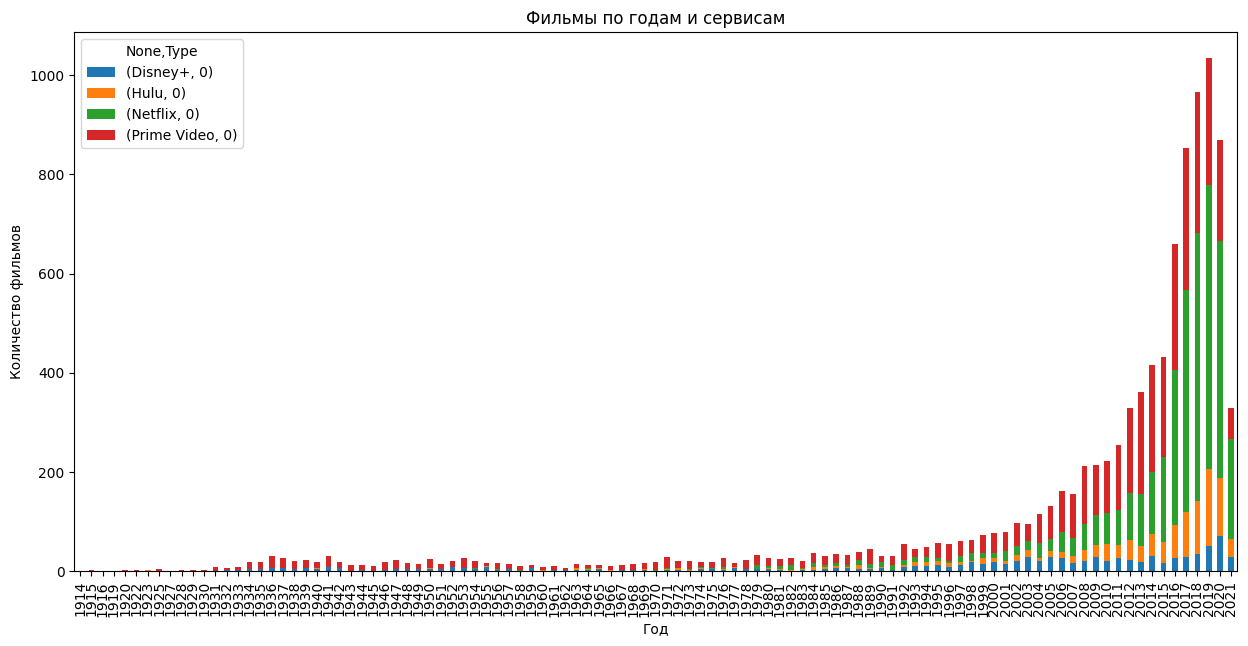

In [14]:
# ЗАДАНИЕ — Визуализировать количество фильмов по годам и стриминговым платформам

# 1) Загрузите CSV-файл "MoviesOnStreamingPlatforms.csv" в DataFrame и выведите первые строки и тип объекта.
# 2) Проверьте типы столбцов и наличие пропусков. Приведите 'Year' к целому типу (при необходимости).
# 3) Замените пропуски (NaN) на None для платформенных колонок ['Netflix', 'Hulu', 'Prime Video', 'Disney+'].
# 4) Сгруппируйте данные по ['Year', 'Type'] и посчитайте сумму по платформенным колонкам. Сбросьте индекс после агрегации.
# 5) Постройте сводную таблицу (pivot), где индекс - 'Year', столбцы - 'Type', значения - суммы по платформенным колонкам.
#    Заполните отсутствующие значения нулями.
# 6) Постройте составную столбчатую диаграмму (stacked bar) по полученной сводной таблице:
#    подпишите заголовок, оси, добавьте легенду (для платформ), настройте размер фигуры и читаемость оси X.
# 7) Убедитесь, что годы отсортированы по возрастанию; при необходимости отсортируйте индекс.
# 8) Отобразите график.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")

df.head()
df 
df.info()
df.dtypes
df = df.where(pd.notnull(df), None)
pd.to_numeric(df['Year'], errors='coerce').astype('Int64') 
# df
df_group = df.groupby(['Year', 'Type']).agg({'Netflix':'sum','Hulu':'sum','Prime Video':'sum','Disney+':'sum'}).reset_index()
# df_group
df_pivot = pd.pivot_table(df_group, values=['Netflix','Hulu','Prime Video','Disney+'], index='Year', columns='Type',aggfunc='sum', fill_value=0)
df_pivot
df_pivot.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Фильмы по годам и сервисам')
plt.xlabel("Год")
plt.ylabel("Количество фильмов")

# - Загрузка/осмотр: pd.read_csv(...); df.head(); type(df); df.info(); df.dtypes
# - Очистка: df.where(pd.notnull(df), None); df.fillna(0); pd.to_numeric(df['Year'], errors='coerce').astype('Int64') или .astype(int)
# - Группировка: df.groupby(['Year', 'Type']).agg({'Netflix':'sum','Hulu':'sum','Prime Video':'sum','Disney+':'sum'}).reset_index()
# - Сводная таблица: pd.pivot_table(..., values=['Netflix','Hulu','Prime Video','Disney+'], index='Year', columns='Type',
#                     aggfunc='sum', fill_value=0)
# - Альтернатива при необходимости «длинных» данных: df.melt(..., var_name='Platform', value_name='Count') + groupby/pivot
# - Сортировка: pivot.sort_index(inplace=True)
# - Визуализация: pivot.plot(kind='bar', stacked=True, figsize=(15,7));
#                 plt.title(...); plt.xlabel("Год"); plt.ylabel("Количество фильмов");
#                 plt.legend(['Netflix','Hulu','Prime Video','Disney+'], title="Стриминговые сервисы");
#                 plt.tight_layout(); plt.show()
